# Análisis de la calidad del aire

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

In [3]:
df = pd.read_csv(r"../data/raw/indian_weather_data.csv")
df.head()

,city,lat,lon,temperature,weather_code,sunrise,sunset,moonrise,moonset,co,...,wind_speed,wind_degree,wind_dir,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
0,New Delhi,28.600,77.200,21,143,07:05 AM,05:26 PM,01:04 AM,01:06 PM,1411.85,...,4,34,NE,1017,0.0,53,50,21,0,1
1,Mumbai,18.975,72.826,30,122,07:03 AM,06:03 PM,01:20 AM,01:29 PM,644.85,...,18,300,WNW,1011,0.0,35,0,32,0,4
2,Kolkata,22.570,88.370,21,143,06:07 AM,04:54 PM,12:16 AM,12:23 PM,457.85,...,8,3,N,1014,0.0,73,0,21,0,3
3,Chennai,13.083,80.283,26,143,06:22 AM,05:44 PM,12:48 AM,01:00 PM,275.85,...,19,31,NNE,1012,0.0,65,25,28,0,5
4,Bengaluru,12.983,77.583,24,113,06:32 AM,05:55 PM,12:59 AM,01:11 PM,243.85,...,9,76,ENE,1015,0.0,25,0,24,0,10


In [4]:
df.columns

Index(['city', 'lat', 'lon', 'temperature', 'weather_code', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'co', 'no2', 'o3', 'so2', 'pm2_5',
       'pm10', 'wind_speed', 'wind_degree', 'wind_dir', 'pressure', 'precip',
       'humidity', 'cloudcover', 'feelslike', 'uv_index', 'visibility'],
      dtype='object')

In [5]:
df.dtypes

city             object
lat             float64
lon             float64
temperature       int64
weather_code      int64
sunrise          object
sunset           object
moonrise         object
moonset          object
co              float64
no2             float64
o3                int64
so2             float64
pm2_5           float64
pm10            float64
wind_speed        int64
wind_degree       int64
wind_dir         object
pressure          int64
precip          float64
humidity          int64
cloudcover        int64
feelslike         int64
uv_index          int64
visibility        int64
dtype: object

## 2. Limpieza y preparación de los datos

In [6]:
columnas_horarias = ['sunrise', 'sunset', 'moonrise', 'moonset']

for col in columnas_horarias:
    df[col] = pd.to_datetime(df[col], format="%I:%M %p").dt.time


In [7]:
df['uv_index'].unique()

array([0])

In [8]:
df.drop(columns=['uv_index'], inplace=True)

---

## 3. Análisis exploratorio
### 3.1 Correlación entre variables

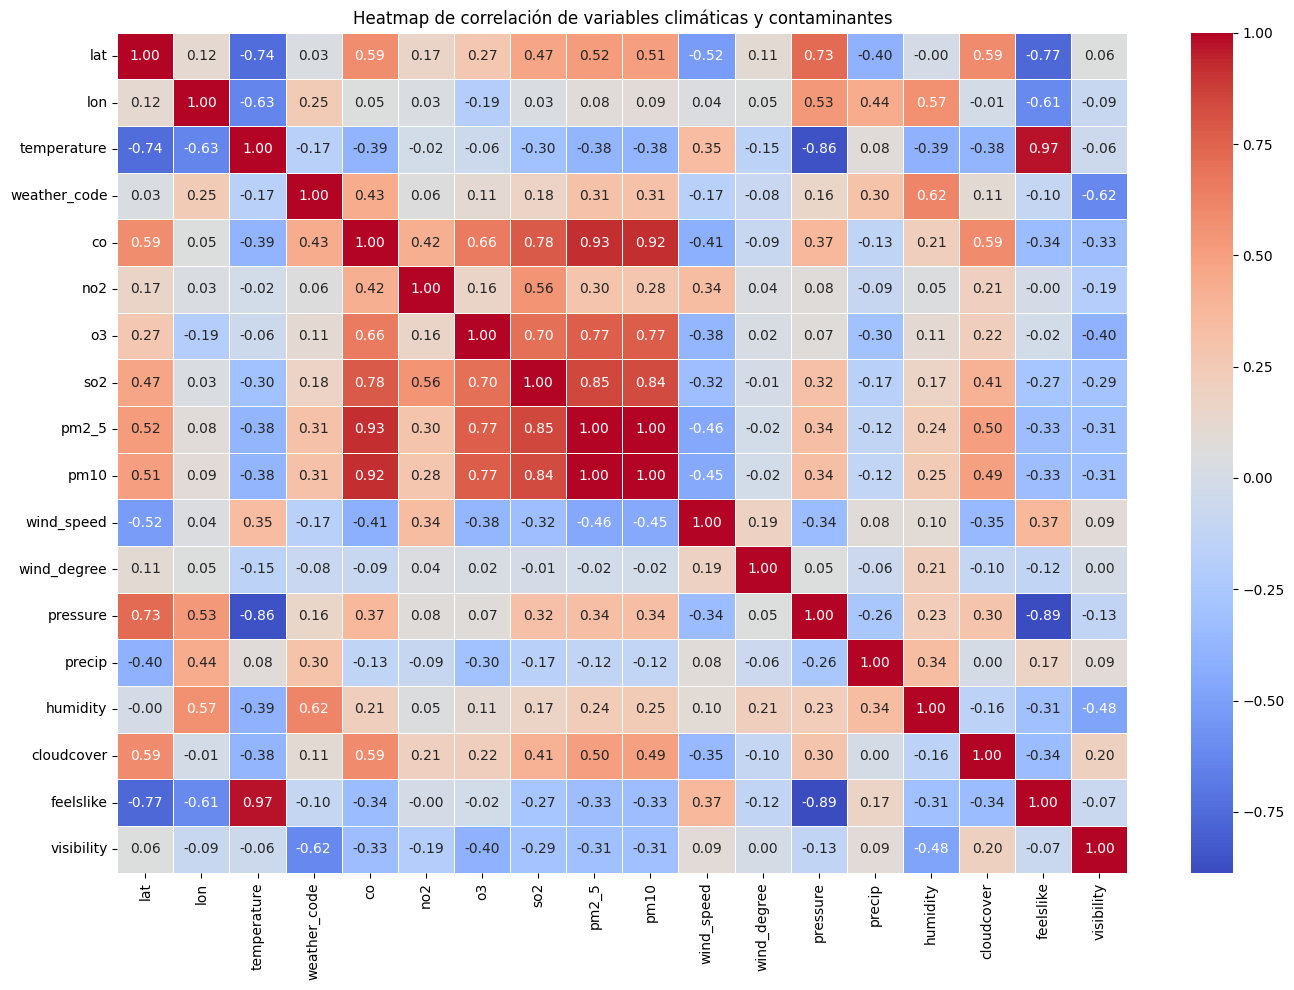

In [9]:
df_num = df.select_dtypes(include=["int64", "float64"])

corr = df_num.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Heatmap de correlación de variables climáticas y contaminantes")
plt.tight_layout()
plt.show()


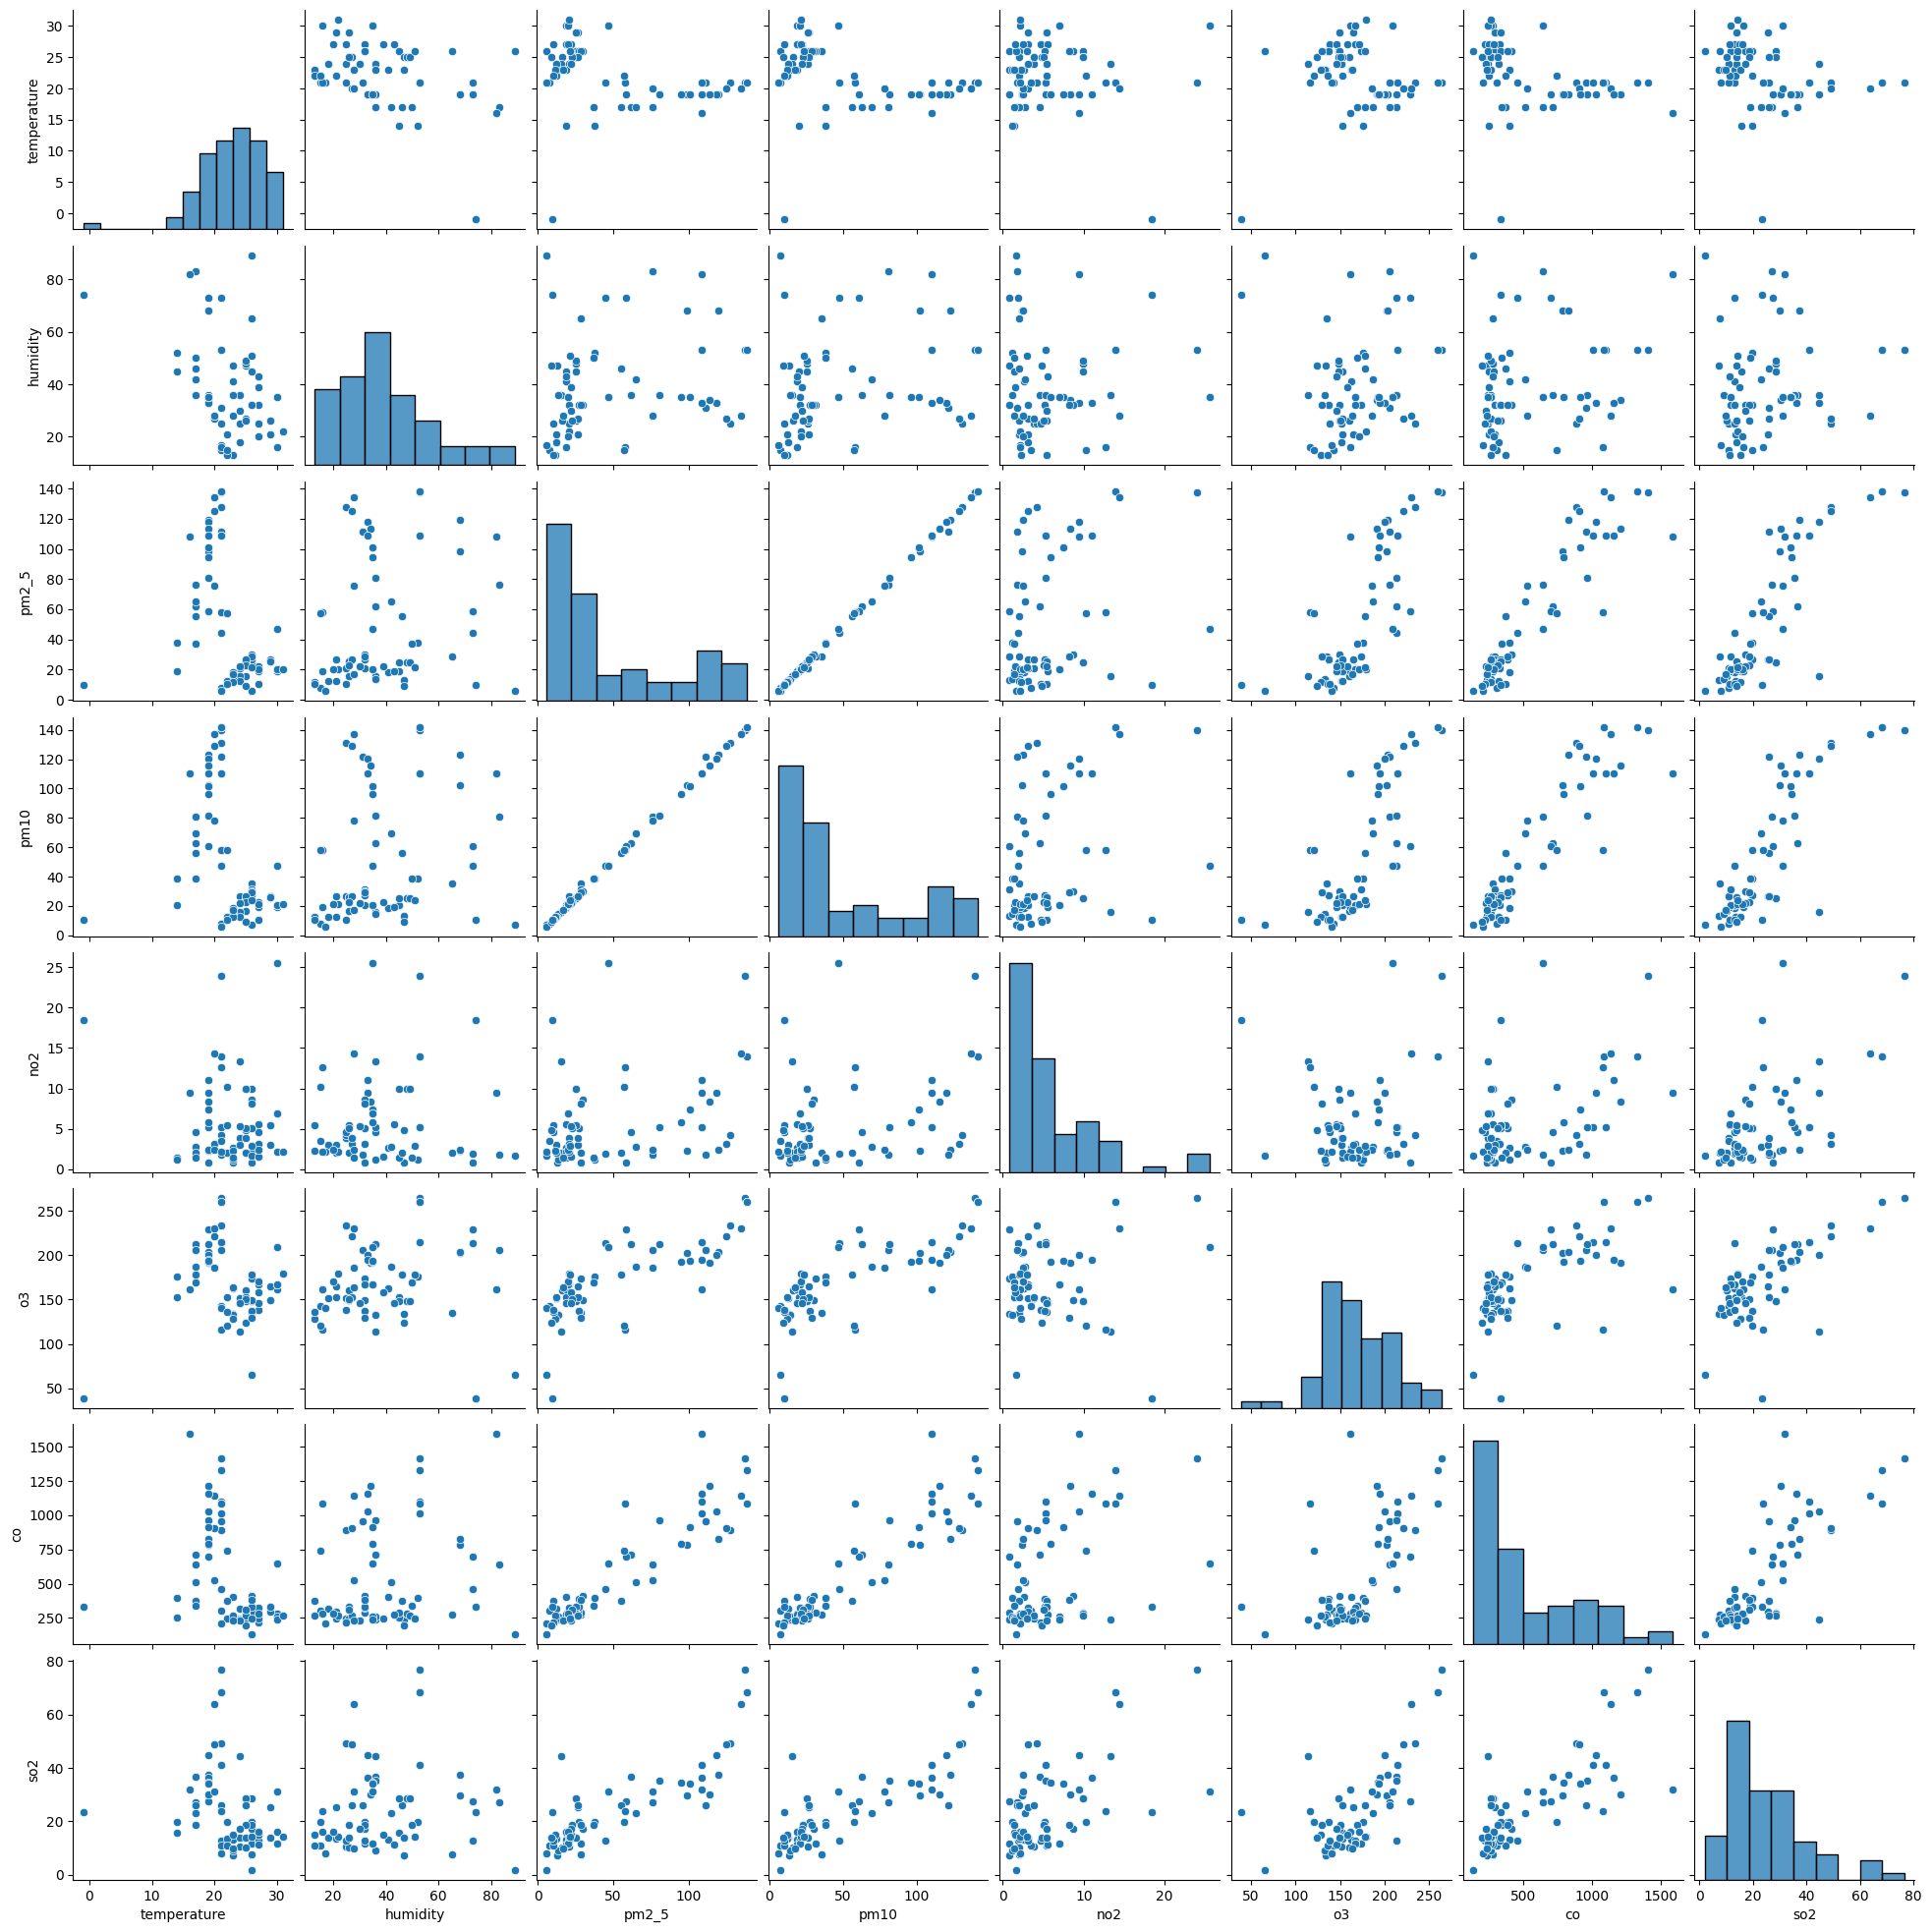

In [27]:
cols = ["temperature", "humidity", "pm2_5", "pm10", "no2", "o3", "co", "so2"]
sns.pairplot(df[cols])

### 3.2 Relación entre O₃, CO, NO₂ y SO₂

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=df["no2"], y=df["co"], z=df["o3"], mode='markers', marker=dict(size=7, color=df["o3"], colorscale="Viridis", opacity=0.7, colorbar=dict(title="O₃")))])

fig.update_layout(title="Relación entre NO₂, CO y O₃", scene=dict(xaxis_title="NO₂", yaxis_title="CO", zaxis_title="O₃"), margin=dict(l=0, r=0, b=0, t=40))

fig.show()


In [21]:
fig = go.Figure(data=[go.Scatter3d(x=df["so2"], y=df["co"], z=df["o3"], mode='markers', marker=dict(size=7, color=df["o3"], colorscale="Viridis", opacity=0.7, colorbar=dict(title="O₃")))])

fig.update_layout(title="Relación entre SO₂, CO y O₃", scene=dict(xaxis_title="SO₂", yaxis_title="CO", zaxis_title="O₃"), margin=dict(l=0, r=0, b=0, t=40))

fig.show()


La similitud en el comportamiento de *SO₂* y *NO₂* frente al *O₃* puede atribuirse a que ambos contaminantes suelen generarse simultáneamente a partir de fuentes comunes de combustión. Por lo tanto, su variación conjunta refleja patrones de emisión compartidos más que un rol directo en la formación del ozono.
> **Nota:** El SO₂ no actúa como precursor directo del ozono troposférico.

### 3.3 Relación entre PM10 y O₃

          2
0.004406 x - 0.664 x + 29.49


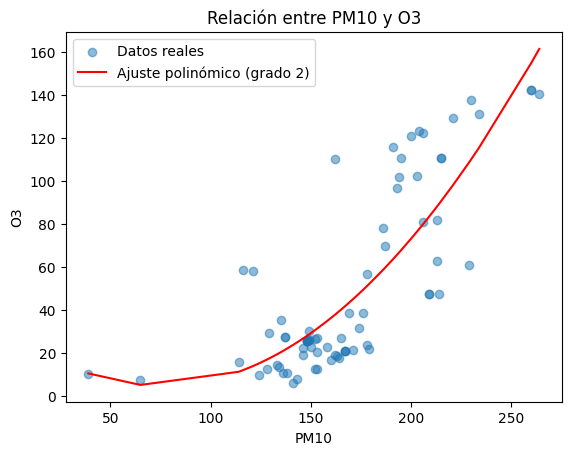

In [26]:
x = df["o3"].values
y = df["pm10"].values

coef = np.polyfit(x, y, 2)

poly = np.poly1d(coef)

print(poly)

x_sorted = np.sort(x)
y_pred = poly(x_sorted)

plt.scatter(x, y, alpha=0.5, label="Datos reales")
plt.plot(x_sorted, y_pred, color="red", label="Ajuste polinómico (grado 2)")

plt.xlabel("PM10")
plt.ylabel("O3")
plt.title("Relación entre PM10 y O3")
plt.legend()
plt.show()


### 3.4 Relación entre CO, PM2.5 y PM10

El gráfico muestra cómo *PM2.5* y *PM10* varían en función del *CO*, utilizando un eje X común. La similitud en sus patrones sugiere la presencia de **fuentes de emisión compartidas**, principalmente asociadas a procesos de **combustión urbana**, como el tráfico vehicular. Esto refuerza la hipótesis de que estos contaminantes están estrechamente relacionados y reflejan el impacto de la actividad vehicular en la calidad del aire.

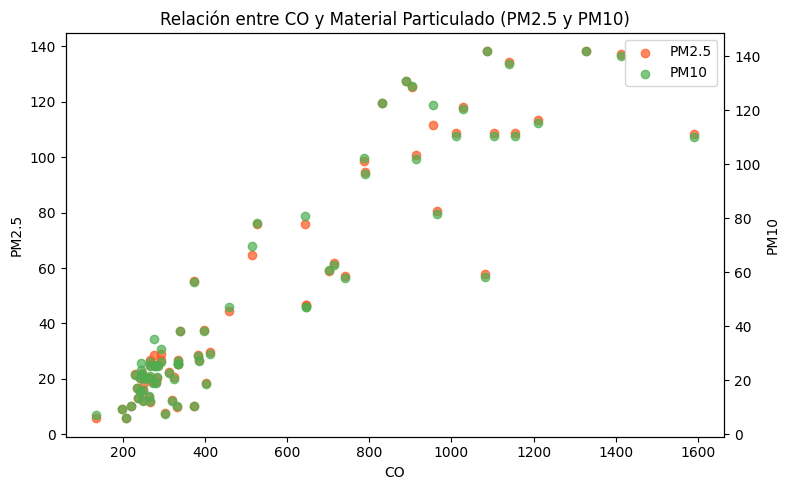

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.scatter(df["co"], df["pm2_5"], alpha=0.7, color="#FF5722", label="PM2.5")
ax1.set_xlabel("CO")
ax1.set_ylabel("PM2.5")

ax2 = ax1.twinx()
ax2.scatter(df["co"], df["pm10"], alpha=0.7, color="#4CAF50",   label="PM10")
ax2.set_ylabel("PM10")

plt.title("Relación entre CO y Material Particulado (PM2.5 y PM10)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="best")

plt.tight_layout()
plt.show()
